## Notebook Imports and Packages

In [95]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm   # color map

from sympy import symbols, diff
from math import log

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

## Example 1 - A simple cost function

## $f(x) = x^2 + x + 1$

In [2]:
def f(x):
    return x**2 + x + 1

In [3]:
# Make Data
# 'linspace' module in numpy generates an array of asked numbers within the start and stop range specified.
x_1 = np.linspace(start=-3, stop=3, num=500)

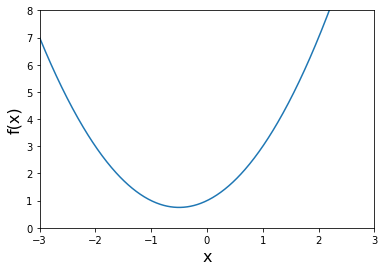

In [4]:
# plot

plt.xlim(-3, 3)
plt.ylim(0, 8)

plt.xlabel('x', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1))
plt.show()

## Slope & Derivatives

Challenge: Create apython function for the derivative of f(x) called df(x)

In [5]:
def df(x):
    return 2*x + 1

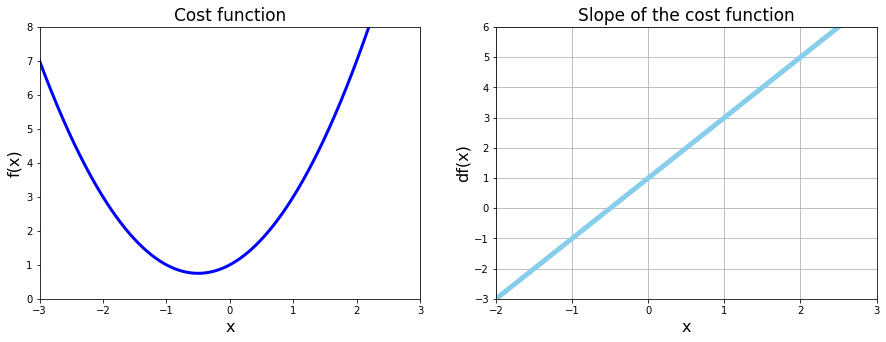

In [6]:
# plot function and derivative side by side

plt.figure(figsize=[15, 5])

# Chart 1: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-3, 3)
plt.ylim(0, 8)

plt.title('Cost function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1), color='blue', linewidth=3)

# Chart 2: Derivative
plt.subplot(1, 2, 2)

plt.grid()

plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.plot(x_1, df(x_1), color='skyblue', linewidth=5)

plt.show()

In [7]:
# Gradient Descent
new_x = 3
previous_x = 0
step_multipier = 0.1
precision = 0.0001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multipier * gradient
    
    step_size = abs(new_x - previous_x)
    #print(step_size)
    
    x_list.append(new_x)
    slope_list.append(df(new_x))
    
    if step_size < precision:
        print('Loop ran this many times:', n)
        break
    
print('Local minimum occurs at:', new_x)
print('Slope or df(x) value at this point is:', df(new_x))
print('f(x) value or cost at this point is:', f(new_x))

Loop ran this many times: 40
Local minimum occurs at: -0.49962781616118024
Slope or df(x) value at this point is: 0.0007443676776395236
f(x) value or cost at this point is: 0.7500001385208099


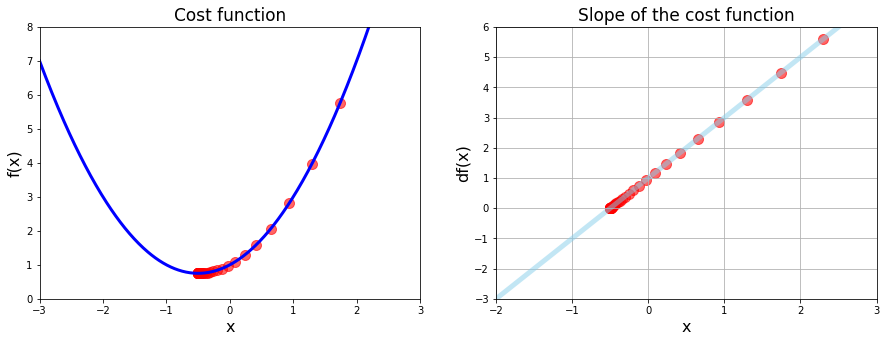

In [8]:
# Superimpose the Gradient Descent calculations.

plt.figure(figsize=[15, 5])

# Chart 1: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-3, 3)
plt.ylim(0, 8)

plt.title('Cost function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1), color='blue', linewidth=3)

values = np.array(x_list)
plt.scatter(x_list, f(values), color='red', alpha=0.6, s=100)

# Chart 2: Derivative
plt.subplot(1, 2, 2)

plt.grid()

plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.plot(x_1, df(x_1), color='skyblue', linewidth=5, alpha=0.5)

plt.scatter(x_list, df(values), color='red', alpha=0.6, s=100)

plt.show()

# Example 2 - Multiple Minima vs Initial Guess & Advanced Functions

## $$g(x) = x^4 - 4x^2 +5$$

In [9]:
# Make some data
x_2 = np.linspace(-2, 2, 1000)

# Challenge: Write the g(x) function and the dg(x) function in Python.
def g(x):
    return x**4 - 4*x**2 + 5

def dg(x):
    return 4*x**3 - 8*x

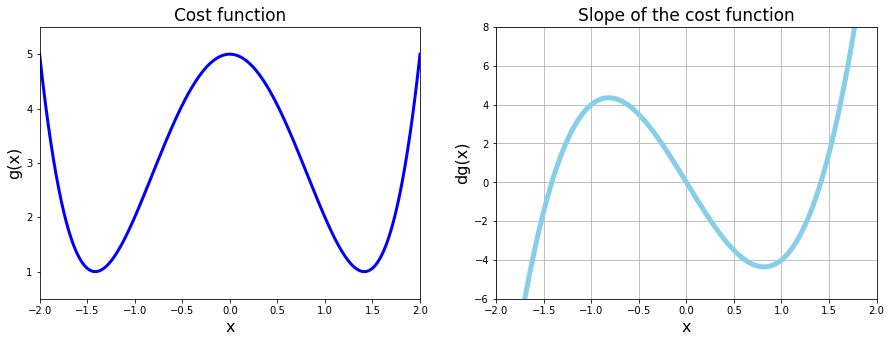

In [10]:
# plot function and derivative side by side

plt.figure(figsize=[15, 5])

# Chart 1: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('g(x)', fontsize=16)
plt.plot(x_2, g(x_2), color='blue', linewidth=3)

# Chart 2: Derivative
plt.subplot(1, 2, 2)

plt.grid()

plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5)

plt.show()

## Gradient Descent as a Python Function

In [11]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001, max_iter=300):

    new_x = initial_guess

    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)

        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < precision:
            break
            
    return new_x, x_list, slope_list

In [12]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=-0.5)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -1.4122375085019094
Number of steps: 23


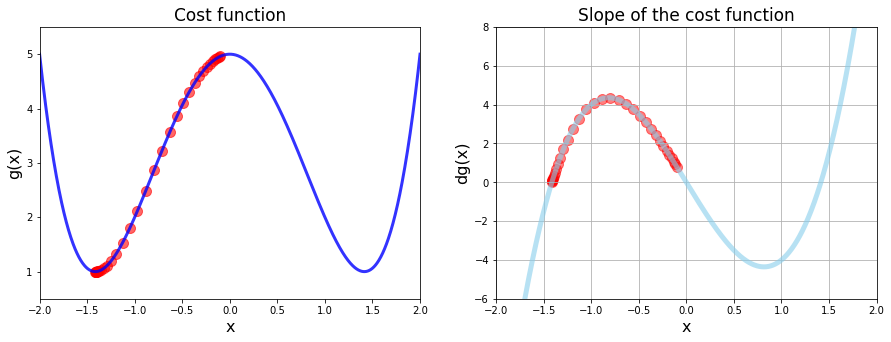

In [13]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=-0.1)
# plot function and derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

# Chart 1: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# Chart 2: Derivative
plt.subplot(1, 2, 2)

plt.grid()

plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

# Example 3 - Divergence, Overflow and Python Tuples
## $$h(x) = x^5 - 2x^4 + 2$$

In [14]:
# Make data
x_3 = np.linspace(start=-2.5, stop=2.5, num=1000)

def h(x):
    return x**5 - 2*x**4 + 2

def dh(x):
    return 5*x**4 - 8*x**3


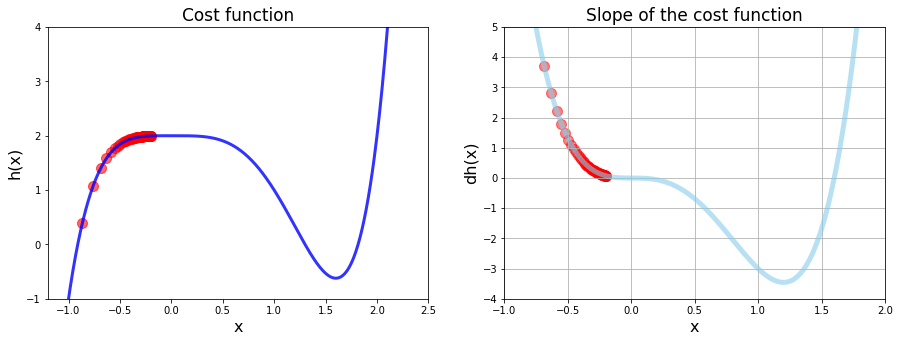

Local min occurs at:  -1.8398461123332792e+24
Cost at this minimum is:  -2.1081790694225687e+121
Number of steps:  72


In [15]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dh, initial_guess=-0.2, max_iter=71)
# plot function and derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

# Chart 1: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-1.2, 2.5)
plt.ylim(-1, 4)

plt.title('Cost function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('h(x)', fontsize=16)

plt.plot(x_3, h(x_3), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, h(np.array(list_x)), color='red', s=100, alpha=0.6)

# Chart 2: Derivative
plt.subplot(1, 2, 2)

plt.grid()

plt.xlim(-1, 2)
plt.ylim(-4, 5)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('dh(x)', fontsize=16)

plt.plot(x_3, dh(x_3), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

print('Local min occurs at: ', local_min)
print('Cost at this minimum is: ', h(local_min))
print('Number of steps: ', len(list_x))

# The Learning Rate

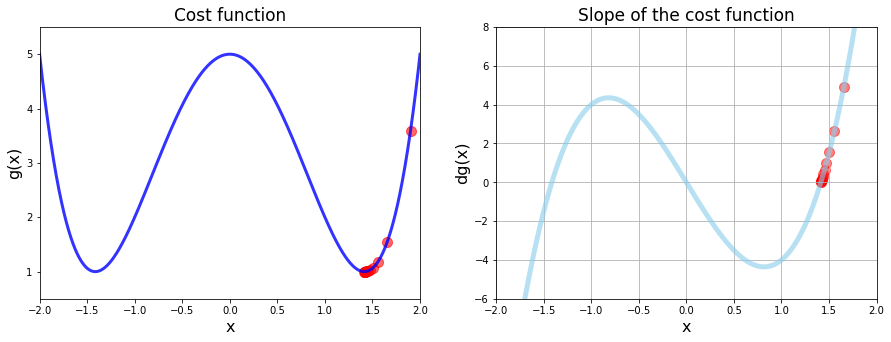

Number of steps is: 14


In [16]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=1.9, multiplier=0.02, max_iter=500)

# plot function and derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

# Chart 1: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# Chart 2: Derivative
plt.subplot(1, 2, 2)

plt.grid()

plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

print('Number of steps is:', len(list_x))

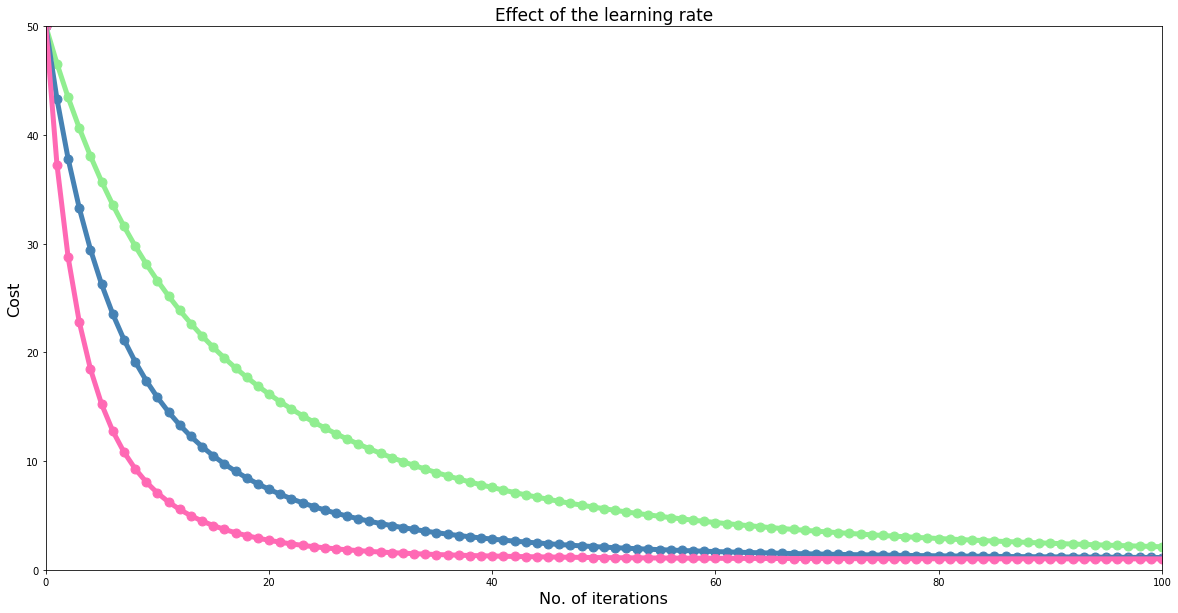

In [17]:
# Calling gradient descent 3 times

n = 100
low_gamma = gradient_descent(derivative_func=dg, initial_guess=3, multiplier=0.0005, precision=0.0001, max_iter=n)
mid_gamma = gradient_descent(derivative_func=dg, initial_guess=3, multiplier=0.001, precision=0.0001, max_iter=n)
high_gamma = gradient_descent(derivative_func=dg, initial_guess=3, multiplier=0.002, precision=0.0001, max_iter=n)

# plot reduction in cost for each interation
plt.figure(figsize=[20, 10])

plt.xlim(0, n)
plt.ylim(0, 50)

plt.title('Effect of the learning rate', fontsize=17)
plt.xlabel('No. of iterations', fontsize=16)
plt.ylabel('Cost', fontsize=16)

# ----------------------------------------------------

# Values for our low gamma charts
# 1) Y Axis Data: convert the lists to numpy arrays
low_values = np.array(low_gamma[1])

# 2) X Axis Data: create a list from 0 to n+1
iteration_list = list(range(0, n+1))

# Plotting low learning rate
plt.plot(iteration_list, g(low_values), color='lightgreen', linewidth=5)
plt.scatter(iteration_list, g(low_values), color='lightgreen', s=80)

# ----------------------------------------------------

# Values for our Mid gamma charts
# 1) Y Axis Data: convert the lists to numpy arrays
mid_values = np.array(mid_gamma[1])

# # 2) X Axis Data: create a list from 0 to n+1
# iteration_list = list(range(0, n+1))

# Plotting Mid learning rate
plt.plot(iteration_list, g(mid_values), color='steelblue', linewidth=5)
plt.scatter(iteration_list, g(mid_values), color='steelblue', s=80)

# ----------------------------------------------------

# Values for our High gamma charts
# 1) Y Axis Data: convert the lists to numpy arrays
high_values = np.array(high_gamma[1])

# # 2) X Axis Data: create a list from 0 to n+1
# iteration_list = list(range(0, n+1))

# Plotting High learning rate
plt.plot(iteration_list, g(high_values), color='hotpink', linewidth=5)
plt.scatter(iteration_list, g(high_values), color='hotpink', s=80)


plt.show()

# Eample 4 - Data Viz with 3D Charts

## Minimise $$f(x,y) = \frac{1}{3^{-x^2 - y^2} + 1}$$

Minimise $$f(x, y) = \frac{1}{r + 1}$$ where $r$ is $3^{-x^2 - y^2}$

In [18]:
def f(x, y):
    r = 3**(-x**2 - y**2)
    return 1/ (r + 1)

In [19]:
# Make our x and y data
x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

print('Shape of X array', x_4.shape)

x_4, y_4 = np.meshgrid(x_4, y_4) #Converting one-dimentional array to two-dimentional array
print('Array after meshgrid', x_4.shape)

Shape of X array (200,)
Array after meshgrid (200, 200)


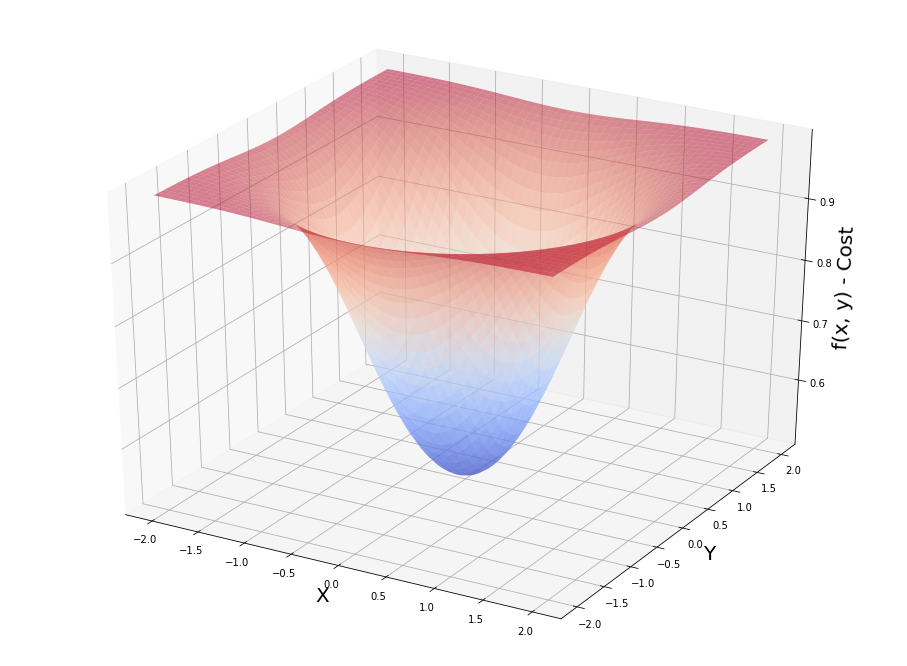

In [20]:
# Generating 3D Plot
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.5)

plt.show()

## Partial Derivatives & Symbolic Computation

## $$\frac{\partial f}{\partial x} = \frac{2x \ln(3) \cdot 3^{-x^2 - y^2}}{\left(3^{-x^2 - y^2} + 1\right)^2}$$
## $$\frac{\partial f}{\partial y} = \frac{2y \ln(3) \cdot 3^{-x^2 - y^2}}{\left(3^{-x^2 - y^2} + 1\right)^2}$$

In [21]:
a, b = symbols('x, y')
print('Our cost function f(x, Y) is: ', f(a, b))
print('Partial derivative wrt x is: ', diff(f(a,b),a))
print('Value of f(x,y) at x=1.8 y=1.0 is:', f(a,b).evalf(subs={a:1.8, b:1.0})) # Python dictionary
print('Value of partial derivative wrt x:', diff(f(a,b), a).evalf(subs={a:1.8, b:1.0}))

Our cost function f(x, Y) is:  1/(3**(-x**2 - y**2) + 1)
Partial derivative wrt x is:  2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Value of f(x,y) at x=1.8 y=1.0 is: 0.990604794032582
Value of partial derivative wrt x: 0.0368089716197505


## Batch Gradient Descent with SymPy

In [30]:
# Setup
multiplier = 0.1
max_iter = 200
params = np.array([1.8, 1.0]) # initial guess

for n in range(max_iter):
    gradient_x = diff(f(a,b), a).evalf(subs={a:params[0], b:params[1]})
    gradient_y = diff(f(a,b), b).evalf(subs={a:params[0], b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    
# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is:', f(params[0], params[1]))

Values in gradient array [0.000461440542096373 0.000256355856720208]
Minimum occurs at x value of:  0.000793898510134722
Minimum occurs at y value of:  0.000441054727852623
The cost is: 0.500000226534985


In [31]:
# Partial derivative functions example 4
def fpx(x, y):
    r = 3**(-x**2 - y**2)
    return 2*x*log(3)*r / (r + 1)**2

def fpy(x, y):
    r = 3**(-x**2 - y**2)
    return 2*y*log(3)*r / (r + 1)**2

In [32]:
# Setup
multiplier = 0.1
max_iter = 200
params = np.array([1.8, 1.0]) # initial guess

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    
# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is:', f(params[0], params[1]))

Values in gradient array [0.00046144 0.00025636]
Minimum occurs at x value of:  0.0007938985101347202
Minimum occurs at y value of:  0.0004410547278526219
The cost is: 0.5000002265349848


## Graphing 3D Gradient Descent & Advanced Numpy Arrays

In [43]:
# Advanced Numpy Array Practice:

kirk = np.array([['Captain', 'Guitar']])
print(kirk.shape)

hs_band = np.array([['Black Thought', 'MC'], ['Questlove', 'Drums']])
print(hs_band.shape)

print('hs_band[0]', hs_band[0])
print('hs_band[0][1]', hs_band[0][1])
print('hs_band[1][0]', hs_band[1][0])

the_roots = np.append(arr=hs_band, values=kirk, axis=0)  # axis=0 adds values as 'rows' and axis=1 adds values as 'columns'
print(the_roots)

print('Printing nicknames...', the_roots[:, 0])

the_roots = np.append(arr=the_roots, values=[['Malik B', 'MC']], axis=0)
print('Printing band roles...', the_roots[:, 1])

(1, 2)
(2, 2)
hs_band[0] ['Black Thought' 'MC']
hs_band[0][1] MC
hs_band[1][0] Questlove
[['Black Thought' 'MC']
 ['Questlove' 'Drums']
 ['Captain' 'Guitar']]
Printing nicknames... ['Black Thought' 'Questlove' 'Captain']
Printing band roles... ['MC' 'Drums' 'Guitar' 'MC']


In [45]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess
values_array = params.reshape(1, 2) # converting one-dimensional array into two-dimensional

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    #values_array = np.append(values_array, params.reshape(1, 2), axis=0)
    values_array = np.concatenate((values_array, params.reshape(1, 2)), axis=0)
    
# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is:', f(params[0], params[1]))

Values in gradient array [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of:  3.458385998858304e-11
Minimum occurs at y value of:  1.9213255549212797e-11
The cost is: 0.5


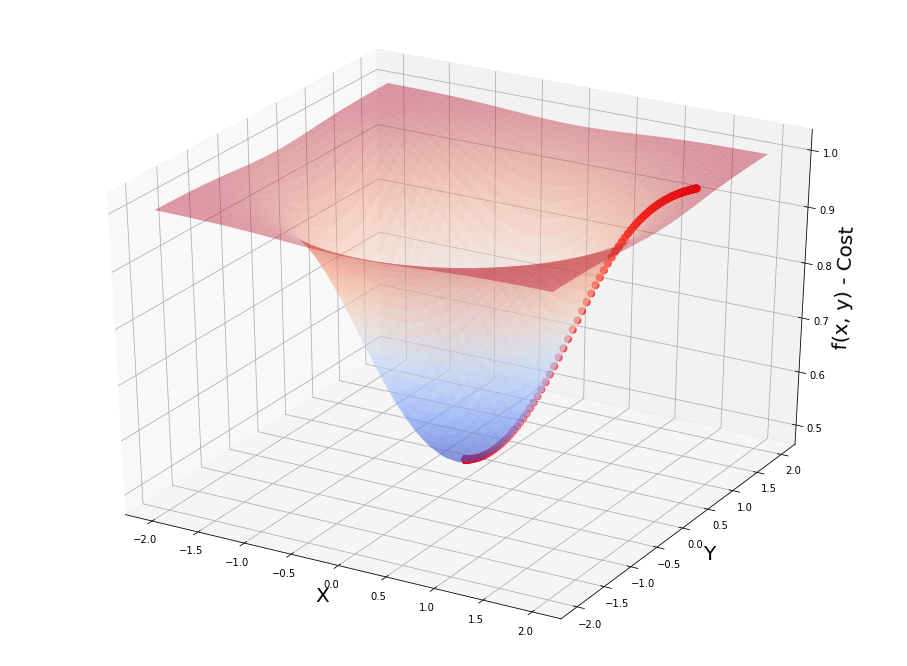

In [46]:
# Generating 3D Plot
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.4)
ax.scatter(values_array[:, 0], values_array[:, 1], f(values_array[:, 0], values_array[:, 1]), s=50, color='red')

plt.show()

# Example 5 - Working with Data & a Real Cost Function
## Mean Squared Error (MSE): a cost function for regression problems
### $$RSS = \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)}\big)^2 $$
### $$MSE = \frac{1}{n}\sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)}\big)^2 $$
### $$MSE = \frac{1}{n}\sum_{i=1}^{n} \big( y - \hat{y} \big)^2 $$

In [51]:
# Make sample data
x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose() # Technique to convert 1D array to 2D
y_5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7,1)  # Another technique to convert 1D array to 2D

print('Shape of x_5 array: ', x_5.shape)
print('Shape of y_5 array: ', y_5.shape)

Shape of x_5 array:  (7, 1)
Shape of y_5 array:  (7, 1)


In [75]:
# Quick Linear Regression
regr = LinearRegression()
regr.fit(x_5, y_5)

theta0 = regr.intercept_[0]
theta1 = regr.coef_[0][0]

print('Theta 0 (intercept):', theta0)
print('Theta 1 (eoefficient):', theta1)

Theta 0 (intercept): 0.8475351486029554
Theta 1 (eoefficient): 1.222726463783591


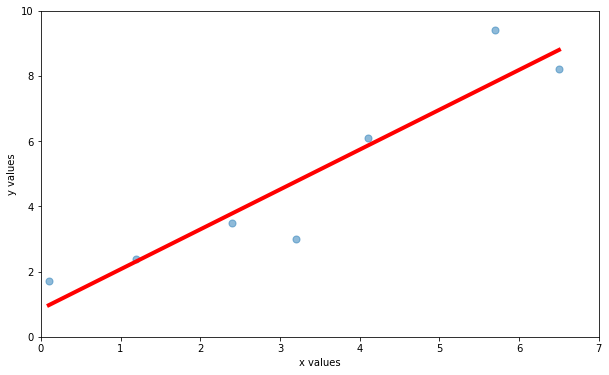

In [76]:
plt.figure(figsize=(10,6))    # Setting the chart size
plt.scatter(x_5, y_5, s=50, alpha=0.5)    # Setting the scatter plot with x,y axis as well as adding transperency using alpha.

plt.plot(x_5, regr.predict(x_5), color='red', linewidth=4)

# plt.title('Film Cost vs Global Revenue')    # Chart title
plt.xlabel('x values')
plt.ylabel('y values')

# To remove/start the chart indexes from (0, 0)
plt.xlim(0,  7)
plt.ylim(0, 10)

plt.show()

In [80]:
# y_hat = theta0 + theta1 * x
y_hat = theta0 + theta1 * x_5
print('Est. values y_hat are: \n', y_hat)
print('In comparison, the actual y values are \n', y_5)

Est. values y_hat are: 
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
In comparison, the actual y values are 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [93]:
# Challenge: Write a python function 'mse(y, y_hat)' returns the MSE.
# Call the 'mse(y, y_hat)' function and print out the MSE for the y_hat calculated

def mse(y, y_hat):
    # mse_calc = np.sum((y - y_hat)**2) / y.size
    mse_calc = np.average((y - y_hat)**2, axis=0)
    return mse_calc

array([0.94796558])

In [96]:
print('Manually calculated MSE is:', mse(y_5, y_hat))
print('MSE regression using manual calc is', mean_squared_error(y_5, y_hat))
print('MSE regression is', mean_squared_error(y_5, regr.predict(x_5)))

Manually calculated MSE is: [0.94796558]
MSE regression using manual calc is 0.9479655759794575
MSE regression is 0.9479655759794575


## 3D Plot for the MSE Cost Function

### Make data for thetas

In [118]:
nr_thetas = 200
th_0 = np.linspace(start=-1, stop=3, num=nr_thetas)
th_1 = np.linspace(start=-1, stop=3, num=nr_thetas)

plot_t0, plot_t1 = np.meshgrid(th_0, th_1)

### Calc MSE using nested for loops

In [119]:
plot_cost = np.zeros((nr_thetas, nr_thetas)) # Creating/Initialising 2D array for storing cost values.

for i in range(nr_thetas):
    for j in range(nr_thetas):
        y_hat = plot_t0[i,j] + plot_t1[i,j] * x_5
        plot_cost[i,j] = mse(y_5, y_hat)

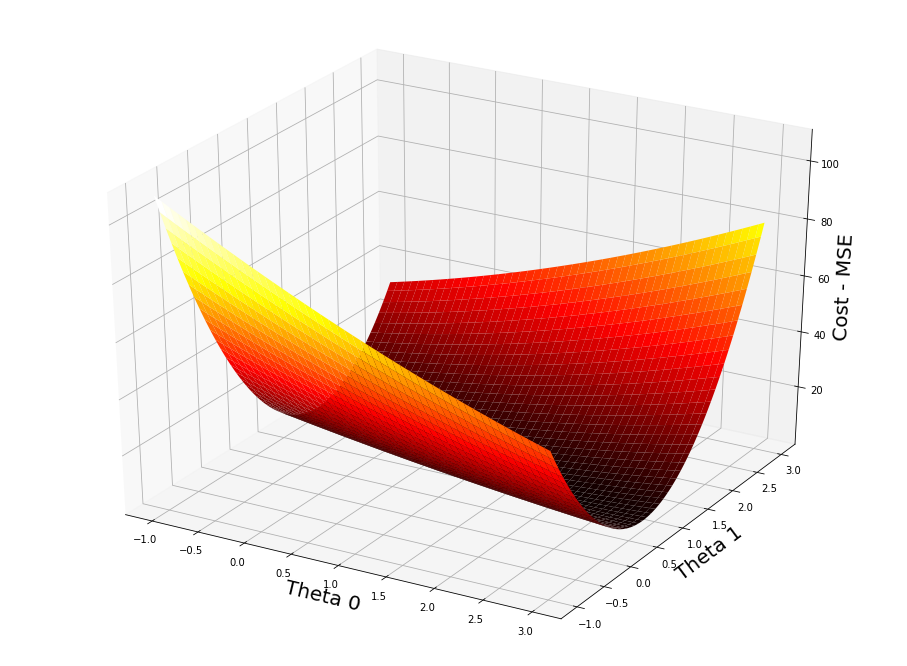

In [121]:
# Plotting MSE
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.hot)
plt.show()

In [125]:
print('Min value of plot_cost', plot_cost.min())
ij_min = np.unravel_index(indices=plot_cost.argmin(), dims=plot_cost.shape)
print('Min occurs at (i,j):', ij_min)
print('Min MSE for Theta 0 at plot_t0[111][91]', plot_t0[111][91])
print('Min MSE for Theta 1 at plot_t1[111][91]', plot_t1[111][91])

Min value of plot_cost 0.9483826526747164
Min occurs at (i,j): (111, 91)
Min MSE for Theta 0 at plot_t0[111][91] 0.829145728643216
Min MSE for Theta 1 at plot_t1[111][91] 1.2311557788944723


d:\gitrepositories\machinelearning\ml_env\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  


## Partial Derivatives of MSE w.r.t. $\theta_0$ and $\theta_1$

## $$\frac{\partial MSE}{\partial \theta_0} = - \frac{2}{n} \sum_{i=1}^{n} \big(y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) $$

## $$\frac{\partial MSE}{\partial \theta_1} = - \frac{2}{n} \sum_{i=1}^{n} \big(y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) \big(x^{(i)} \big) $$

## MSE & Gradient Descent

In [136]:
# x values, y values, array of theta parameters (theta0 at index 0 and theta1 at index1)
def grad(x, y, thetas):
    n = y.size
    
    theta0_slope = (-2/n) * sum(y - thetas[0] - thetas[1]*x)
    theta1_slope = (-2/n) * sum((y - thetas[0] - thetas[1]*x) * x)
    
    #return np.array([theta0_slope[0], theta1_slope[0]])
    #return np.append(arr=theta0_slope, values=theta1_slope)
    return np.concatenate((theta0_slope, theta1_slope), axis=0)

In [138]:
multiplier = 0.01
thetas = np.array([2.9, 2.9])

# Collect data points for scatter plot
plot_vals = thetas.reshape(1, 2)
mse_vals = mse(y_5, thetas[0] + thetas[1] * x_5)

for i in range(1000):
    thetas = thetas - multiplier * grad(x_5, y_5, thetas)
    
    # Append the new values to our numpy arrays
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1, 2)), axis=0)
    mse_vals = np.append(arr=mse_vals, values=mse(y_5, thetas[0] + thetas[1] * x_5))
    
# Results
print('Min occurs at Theta 0:', thetas[0])
print('Min occurs at Theta 1:', thetas[1])
print('MSE is:', mse(y_5, thetas[0] + thetas[1] * x_5))

Min occurs at Theta 0: 0.8532230461743415
Min occurs at Theta 1: 1.2214935332607393
MSE is: [0.94797511]


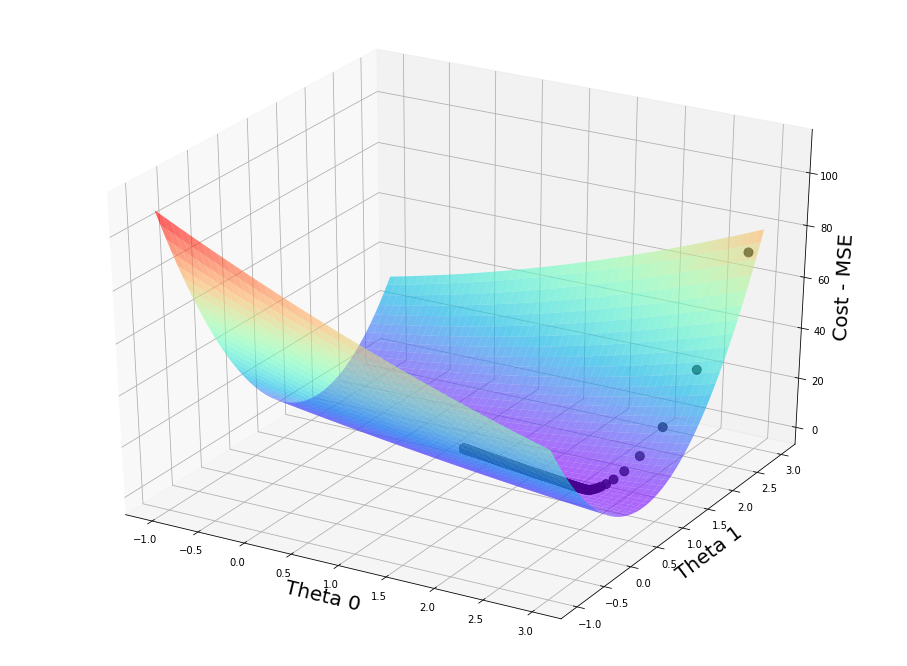

In [142]:
# Plotting MSE
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.scatter(plot_vals[:, 0], plot_vals[:, 1], mse_vals, s=80, color='black')
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.rainbow, alpha=0.6)
plt.show()